## Velocity Dispersion Testing

In [1]:
import ctypes
import time
import scipy.special as sp
from matplotlib import pyplot as plt
import numpy as np

ibc = ctypes.CDLL("../cmake-build-debug/lib/libfoo.so")

### p_n

In [2]:
sersic_index = np.linspace(1, 6, 200)
res_store_c = np.zeros_like(sersic_index)
res_store_py = np.zeros_like(sersic_index)

In [3]:
ibc.p_nex.argtypes = [ctypes.c_float]
ibc.p_nex.restype = ctypes.c_float 

start = time.process_time()

for i, n in enumerate(sersic_index):
    res_store_c[i] = ibc.p_nex(float(n))

print("Time: {} seconds".format(time.process_time() - start))

Time: 0.000756000000000423 seconds


In [4]:
def p_n_func(n):
    return 1 - (0.6097/n) + (0.00563/(n**2))

start = time.process_time()

for i, n in enumerate(sersic_index):
    res_store_py[i] = p_n_func(n)
    
print("Time: {} seconds".format(time.process_time() - start))


Time: 0.0007760000000001099 seconds


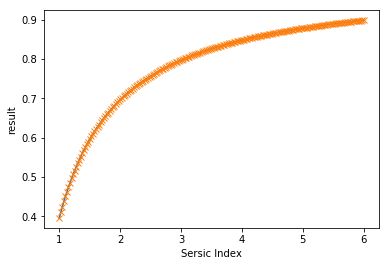

In [5]:
plt.figure()
plt.plot(sersic_index, res_store_c)
plt.plot(sersic_index, res_store_py, 'x')
plt.xlabel("Sersic Index")
plt.ylabel("result")
plt.show()

### p_0

In [6]:
R = 10.
r_range = np.linspace(R, 100, 200)
HLR = 30.
beta = 0.1
SersicIndex = 2.
stellar_mass = 10**7
halo_mass = 10**8
halo_size = 2 * HLR

store = np.zeros_like(r_range)

In [7]:
ibc.innards.argtypes = [ctypes.c_float, 
                        ctypes.c_float, 
                        ctypes.c_float,
                        ctypes.c_float,
                        ctypes.c_float,
                        ctypes.c_float,
                        ctypes.c_float,
                        ctypes.c_float]

ibc.innards.restype = ctypes.c_float 

In [8]:
for i, value in enumerate(r_range):
    store[i] = ibc.innards(value, R, beta, HLR, SersicIndex, stellar_mass, halo_mass, halo_size)

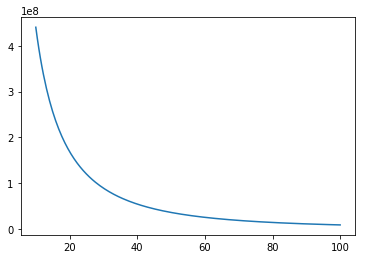

array([4.40816896e+08, 4.16345824e+08, 3.94003200e+08, 3.73532480e+08,
       3.54716384e+08, 3.37369568e+08, 3.21333440e+08, 3.06471040e+08,
       2.92663744e+08, 2.79808224e+08, 2.67814032e+08, 2.56601696e+08,
       2.46101184e+08, 2.36250304e+08, 2.26994080e+08, 2.18283152e+08,
       2.10073616e+08, 2.02326000e+08, 1.95004848e+08, 1.88078080e+08,
       1.81516736e+08, 1.75294656e+08, 1.69387936e+08, 1.63774912e+08,
       1.58435760e+08, 1.53352384e+08, 1.48508160e+08, 1.43887936e+08,
       1.39477792e+08, 1.35264720e+08, 1.31236896e+08, 1.27383424e+08,
       1.23694088e+08, 1.20159520e+08, 1.16771040e+08, 1.13520544e+08,
       1.10400488e+08, 1.07403904e+08, 1.04524256e+08, 1.01755440e+08,
       9.90917760e+07, 9.65279680e+07, 9.40590080e+07, 9.16802160e+07,
       8.93872560e+07, 8.71759920e+07, 8.50425920e+07, 8.29833840e+07,
       8.09949840e+07, 7.90741600e+07, 7.72178800e+07, 7.54232800e+07,
       7.36876400e+07, 7.20084320e+07, 7.03832160e+07, 6.88097280e+07,
      

In [9]:
plt.figure()
plt.plot(r_range, store)
plt.show()

store